In [4]:
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors, Lipinski, Crippen
from rdkit.Chem import rdMolDescriptors
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def plot_csp3(child_csp3, parent_csp3, csp3_diff):
    # Define the range and bin width
    x_range = (0, 1)
    bin_width = 0.05  # Define a desired bin width
    
    # Calculate the number of bins
    bins = np.arange(x_range[0], x_range[1] + bin_width, bin_width)

    # Plot histograms for metabolite and parent weights side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].hist(parent_csp3, bins=bins, color='lightseagreen')
    axes[0].set_title('Parent CSP3 Fraction')
    axes[0].set_xlabel('CSP3 Fraction')
    axes[0].set_ylabel('Frequency')
    #axes[0].set_xlim(0, 1200)
    axes[0].set_ylim(0, 500)

    axes[1].hist(child_csp3, bins=bins, color='mediumturquoise')
    axes[1].set_title('Child CSP3 Fraction')
    axes[1].set_xlabel('CSP3 Fraction')
    axes[1].set_ylabel('Frequency')
    #axes[1].set_xlim(0, 1200)
    axes[1].set_ylim(0, 500)

    plt.tight_layout()
    plt.show()

    # Plot histogram for weight differences
    plt.figure(figsize=(6, 5))
    plt.hist(csp3_diff, bins=bins, color='mediumvioletred')
    plt.title('CSP3 Fraction Differences (Parent - Metabolite)')
    plt.xlabel('CSP3 Fraction')
    plt.ylabel('Frequency')
    #plt.xlim(0, 1)
    plt.show()


def csp3_analysis(datafile): # input dataset needs columns 'parent_smiles' and 'child_smiles'
    dataset = pd.read_csv(datafile)

    child_csp3_list, parent_csp3_list, csp3_diff_list = [], [], []

    parents = dataset["parent_smiles"]
    children = dataset["child_smiles"]

    for parent, child in zip(parents, children):

        parent = Chem.MolFromSmiles(parent)
        child = Chem.MolFromSmiles(child)

        child_csp3 = round(Descriptors.FractionCSP3(child), 3)
        child_csp3_list.append(child_csp3)

        parent_csp3 = round(Descriptors.FractionCSP3(parent), 3)
        parent_csp3_list.append(parent_csp3)

        diff = (parent_csp3-child_csp3)
        csp3_diff_list.append (diff)

    return child_csp3_list, parent_csp3_list, csp3_diff_list

In [5]:
datafile = '/projects/cc/se_users/carlsson_ksmq649/MasterThesis/dataset/curated_data/combined_smiles_clean.csv'
child_csp3, parent_csp3, csp3_diff = csp3_analysis(datafile)
print(min(parent_csp3), max(parent_csp3))
print(min(child_csp3), max(child_csp3))

0.0 1.0
0.0 1.0


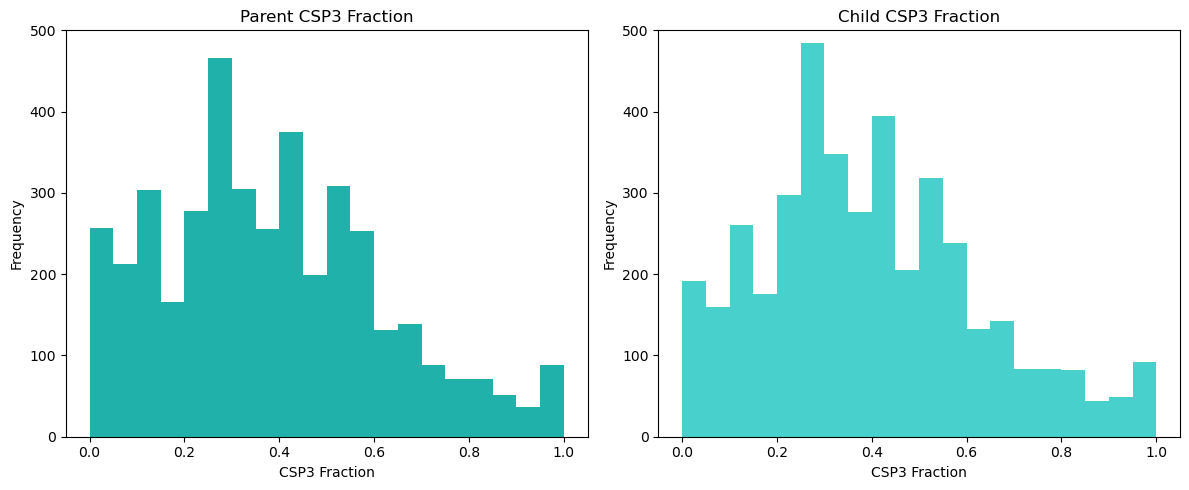

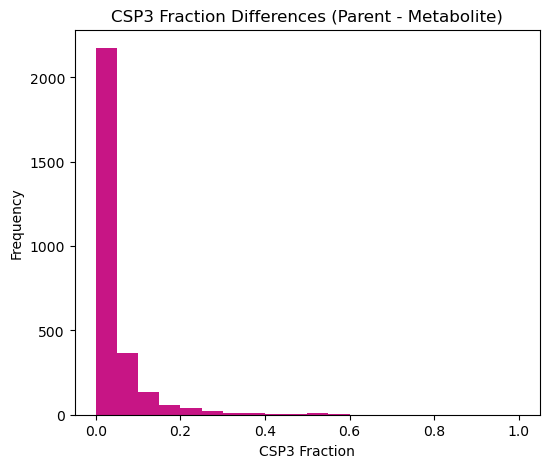

In [6]:
plot_csp3(child_csp3, parent_csp3, csp3_diff)